## Домашняя работа 4.2 Анализ и визуализация данных

> Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
%matplotlib inline

> Секция настроек

In [2]:
BASE_DIR = "/Users/sandrynin/development/projects/Netology/Python/OpenData/names"
START_YEAR = 1900
END_YEAR = 2000
STEP = 5

> Функция генератор выходных значений

In [3]:
def df_per_years(name, start_year=START_YEAR, end_year=END_YEAR, step=STEP):
    for year in range(start_year, end_year, step):
        file = os.path.join(BASE_DIR, 'yob{}.txt'.format(year))
        data = pd.read_csv(file, names=['Name', 'Gender', 'Count'])
        name_count = data[data.Name == name].Count.sum()
        yield name_count

In [4]:
def name_dynamics(name_list, step=STEP):
    result = pd.DataFrame()
    for name in name_list:
        count_list = list(df_per_years(name, START_YEAR, END_YEAR + step , step))
        index_list = (year for year in range(START_YEAR, END_YEAR + step, step))
        data = pd.DataFrame({name: count_list}, index = index_list)
        if result.empty:
            result = data
        else:    
            result = pd.concat([result, data], axis=1)
    return result

## Задача 1
> Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

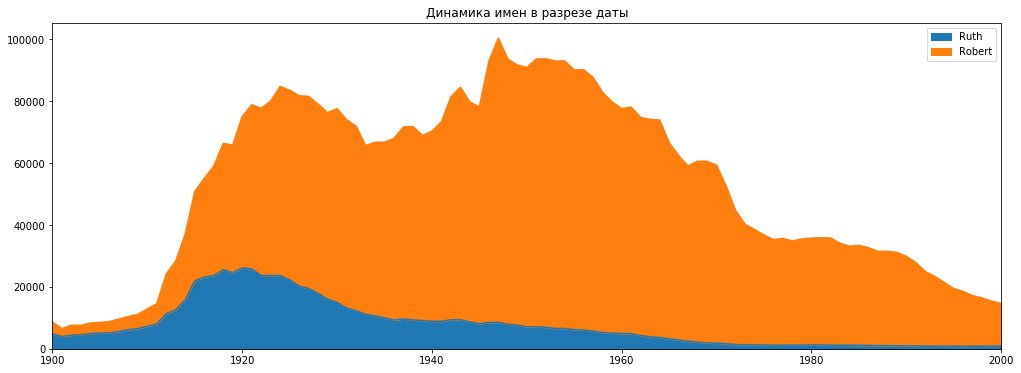

In [5]:
name_dynamics(['Ruth', 'Robert'], step=1).plot(kind='area', figsize=(17,6), title='Динамика имен в разрезе даты')

## Задача 2
> Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

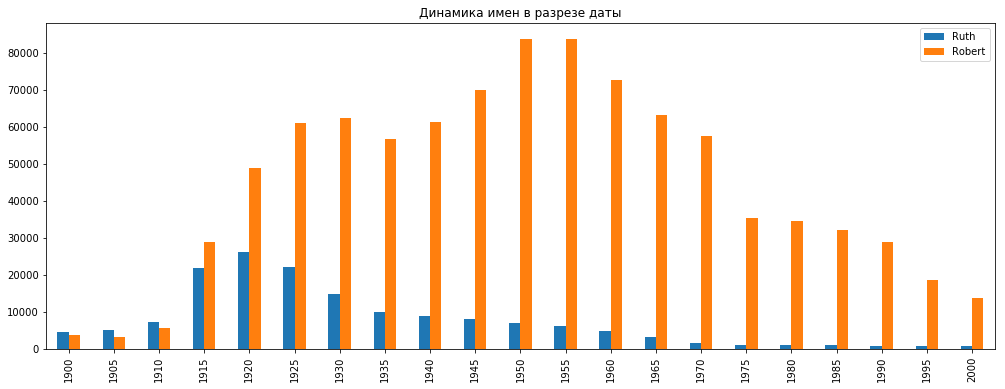

In [6]:
name_dynamics(['Ruth', 'Robert'], step=5).plot.bar(figsize=(17,6), title='Динамика имен в разрезе даты')

## Задача 3
> Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

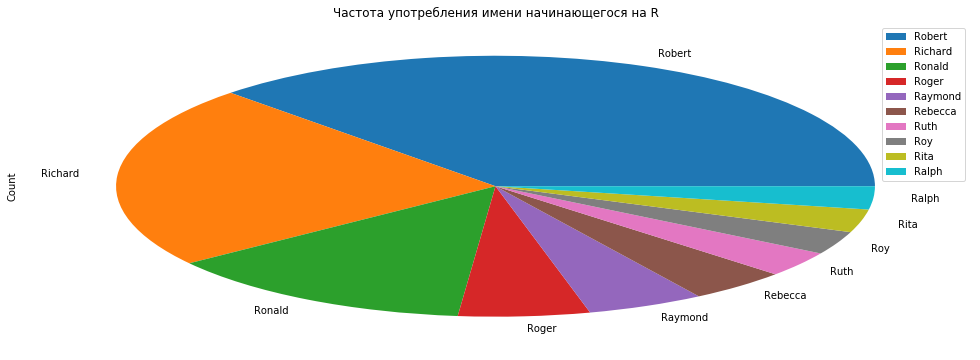

In [7]:
file = os.path.join(BASE_DIR, 'yob1950.txt')
data = pd.read_csv(file, names=['Name', 'Gender', 'Count'])
data = data[data.Name.str.startswith('R')]
data = data.groupby('Name').sum()
data = data.sort_values(by='Count', axis=0, ascending=False).head(10)
data.plot.pie(y='Count', figsize=(17,6), title='Частота употребления имени начинающегося на R')

## Задача 4
> Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [8]:
def consonants_count(name):
    consonants = list("bcdfghjklmnpqrstvwxz")
    number_of_consonants = sum(x in consonants for x in name.lower())
    return number_of_consonants

In [9]:
def df_generator(start_year=START_YEAR, end_year=END_YEAR):
    for year in range(start_year, end_year):
        file = os.path.join(BASE_DIR, 'yob{}.txt'.format(year))
        data = pd.read_csv(file, names=['Name', 'Gender', 'Count'])
        yield data

In [10]:
def df_preparation():
    res = pd.concat(df_generator())
    res = res.groupby(['Name']).sum()
    res= res.reset_index()
    return res

In [11]:
names = df_preparation()

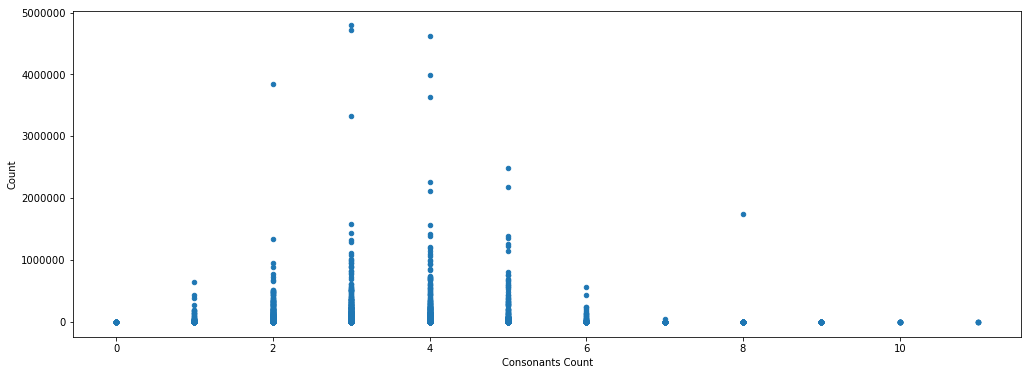

In [12]:
names['Consonants Count'] = names.apply(lambda row: consonants_count(row.Name), axis=1)
names.plot.scatter(x='Consonants Count', y='Count', figsize=(17,6))